In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
train.drop(['boat','body','home.dest'],axis=1,inplace=True)

In [5]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0


In [6]:
train.isnull()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,False,False,False,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
845,False,False,False,False,False,False,False,False,False,False,False,False
846,False,False,False,False,False,False,False,False,False,False,False,False
847,False,False,False,False,False,False,False,False,False,True,False,False
848,False,False,False,False,False,False,False,False,False,True,False,False


<AxesSubplot:>

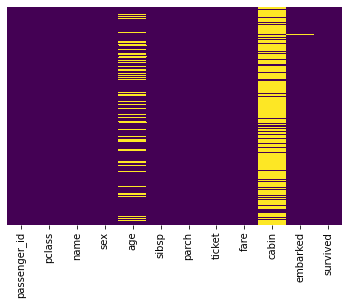

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='survived', ylabel='count'>

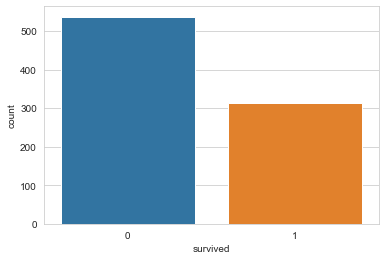

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=train)

<AxesSubplot:xlabel='survived', ylabel='count'>

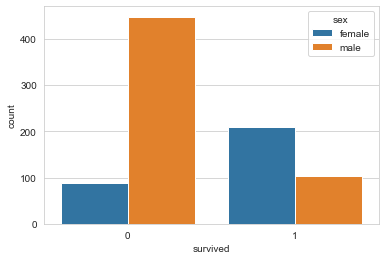

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=train)

<AxesSubplot:xlabel='survived', ylabel='count'>

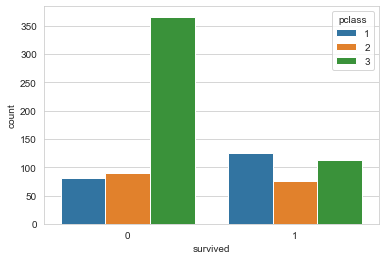

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=train)    

C:\Users\aaa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

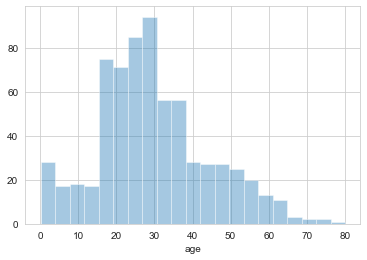

In [12]:
sns.distplot(train['age'].dropna(),kde=False)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

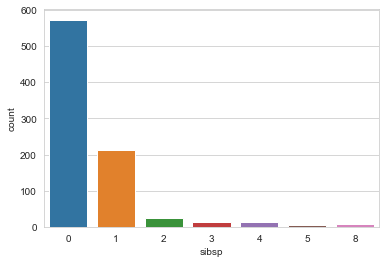

In [13]:
sns.countplot(x='sibsp',data=train)

# Cleaning Data 

<AxesSubplot:xlabel='pclass', ylabel='age'>

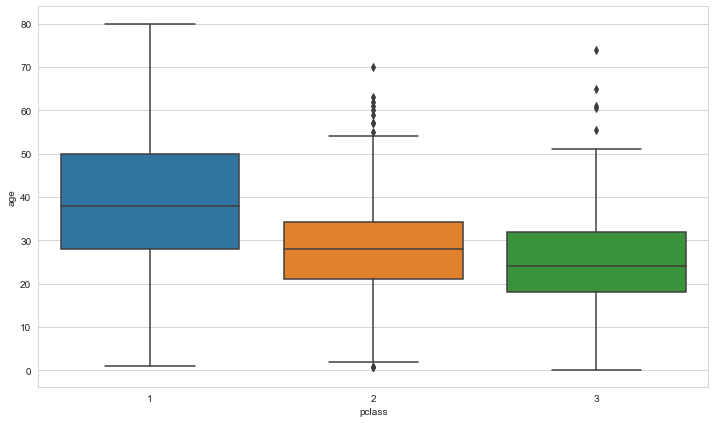

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=train)

In [19]:
def input_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [20]:
train['age']= train[['age','pclass']].apply(input_age,axis=1)

<AxesSubplot:>

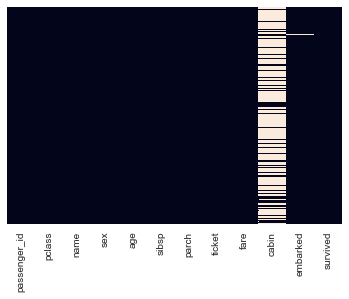

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [22]:
train.drop('cabin',axis=1,inplace=True)

In [23]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,24.0,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0


In [24]:
train.dropna(inplace = True)

# Converting Categorial Features

In [26]:
pd.get_dummies(train['embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
Embarked = pd.get_dummies(train['embarked'],drop_first=True).head()
Sex = pd.get_dummies(train['sex'],drop_first=True).head()

In [28]:
train.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [29]:
train.head()

,passenger_id,pclass,age,sibsp,parch,fare,survived
0,1216,3,24.0,0,0,7.7333,1
1,699,3,38.0,0,0,8.6625,0
2,1267,3,30.0,1,1,24.1500,0
3,449,2,54.0,1,3,23.0000,1
4,576,2,40.0,0,0,13.0000,0


In [31]:
train = pd.concat([train,Embarked,Sex],axis=1)

In [32]:
train.head()

,passenger_id,pclass,age,sibsp,parch,fare,survived,Q,S,male
0,1216,3,24.0,0,0,7.7333,1,1.0,0.0,0.0
1,699,3,38.0,0,0,8.6625,0,0.0,1.0,1.0
2,1267,3,30.0,1,1,24.1500,0,0.0,1.0,0.0
3,449,2,54.0,1,3,23.0000,1,0.0,1.0,0.0
4,576,2,40.0,0,0,13.0000,0,0.0,1.0,1.0


# Building Logic regression model

In [34]:
train.drop('survived',axis=1).head()

,passenger_id,pclass,age,sibsp,parch,fare,Q,S,male
0,1216,3,24.0,0,0,7.7333,1.0,0.0,0.0
1,699,3,38.0,0,0,8.6625,0.0,1.0,1.0
2,1267,3,30.0,1,1,24.1500,0.0,1.0,0.0
3,449,2,54.0,1,3,23.0000,0.0,1.0,0.0
4,576,2,40.0,0,0,13.0000,0.0,1.0,1.0


In [44]:
train.isnull().count()

passenger_id    848
pclass          848
age             848
sibsp           848
parch           848
fare            848
survived        848
Q               848
S               848
male            848
dtype: int64

In [35]:
train['survived'].head()

0    1
1    0
2    0
3    1
4    0
Name: survived, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('survived',axis=1),train['survived'],test_size=0.30,random_state=101)

# logistic regression model

In [38]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').